In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

# Read data from CSV and convert to numpy array
tab = pd.read_csv('SimTempDat_StepUp_0_1.csv').values
tab

array([[0.00000000e+00, 2.00000000e+01, 2.00000000e+01, ...,
        2.00000000e+01, 2.00000000e+01, 2.00000000e+01],
       [9.00000000e+02, 2.01962094e+01, 2.00005112e+01, ...,
        2.00000000e+01, 2.00000000e+01, 2.00000000e+01],
       [1.80000000e+03, 2.03915786e+01, 2.00085826e+01, ...,
        2.00000000e+01, 2.00000000e+01, 2.00000000e+01],
       ...,
       [1.72530000e+06, 1.94147290e+01, 1.95712000e+01, ...,
        2.00000157e+01, 2.00000040e+01, 2.00000008e+01],
       [1.72620000e+06, 1.96084214e+01, 1.96055264e+01, ...,
        2.00000151e+01, 2.00000040e+01, 2.00000008e+01],
       [1.72710000e+06, 1.98037906e+01, 1.96415420e+01, ...,
        2.00000145e+01, 2.00000040e+01, 2.00000008e+01]])

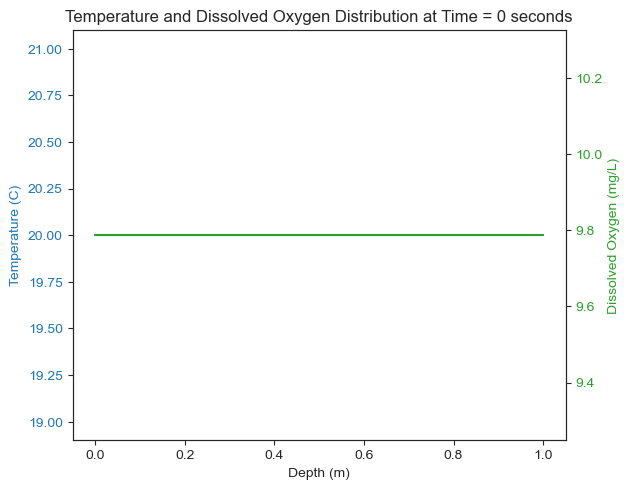

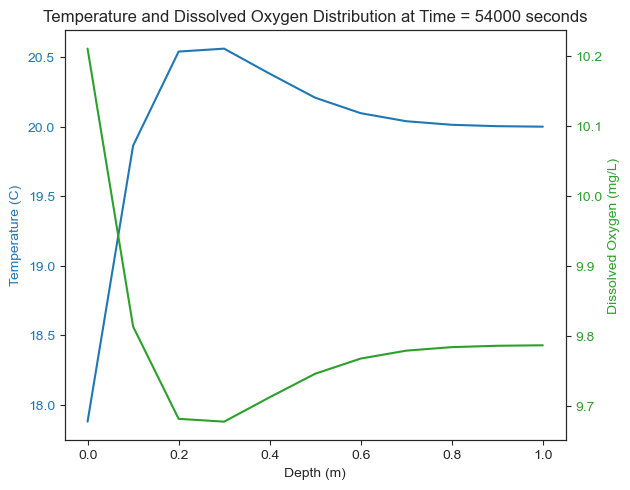

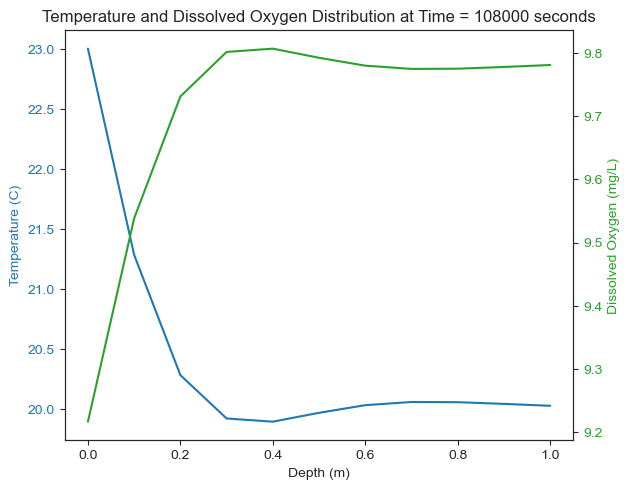

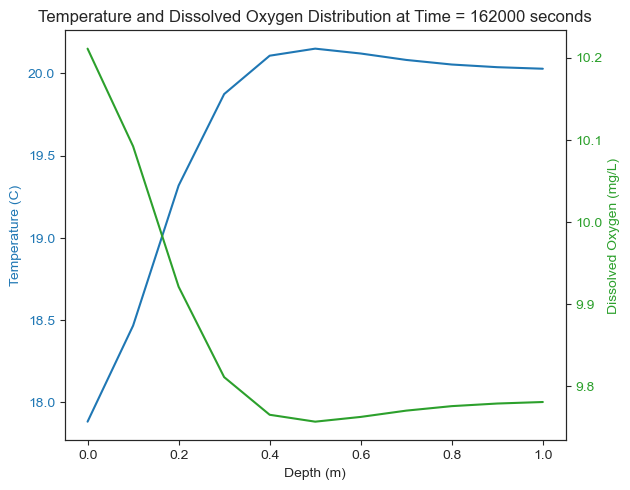

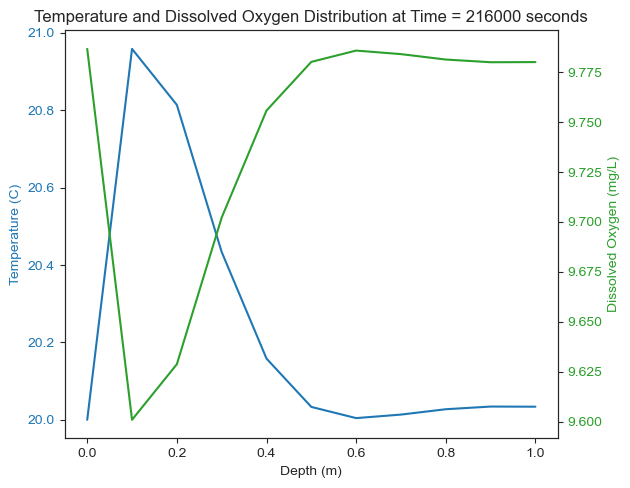

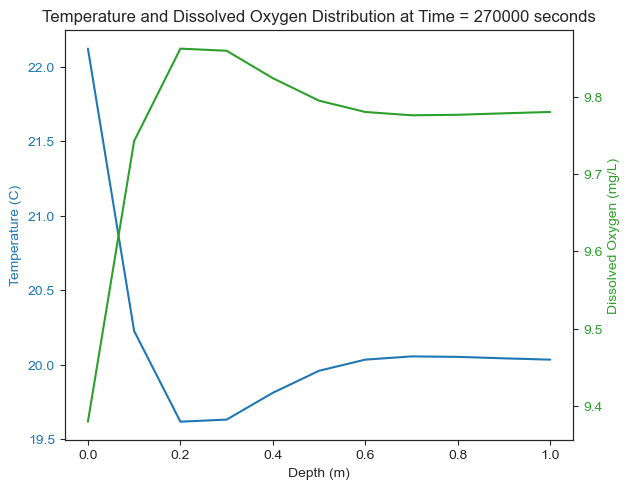

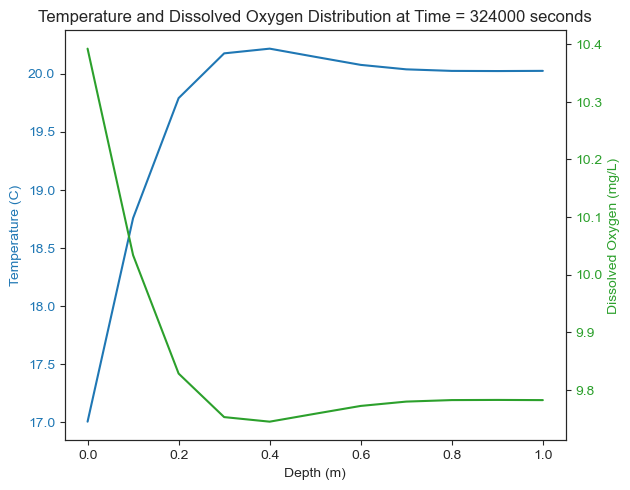

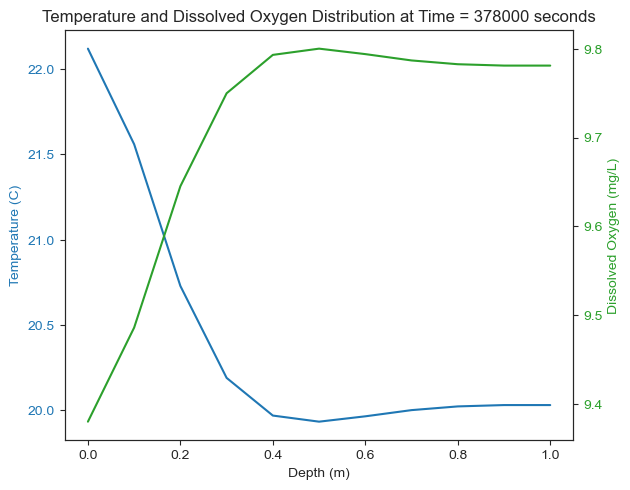

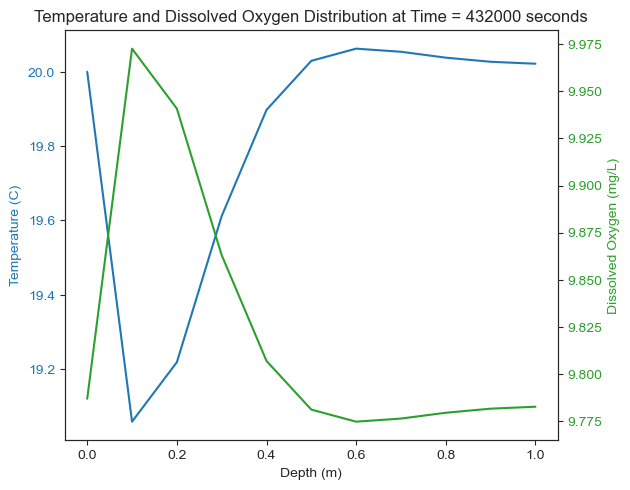

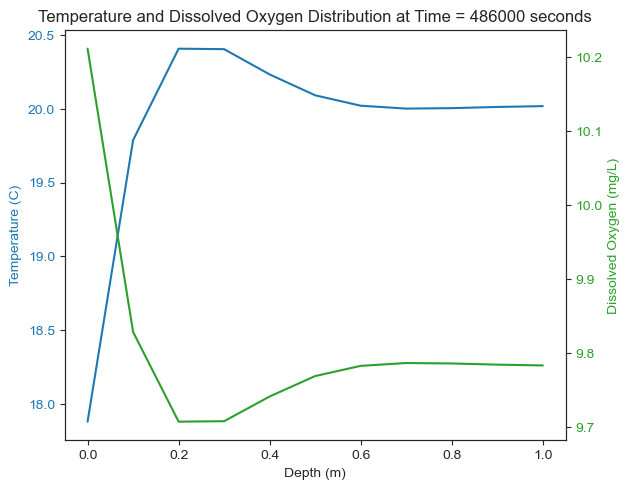

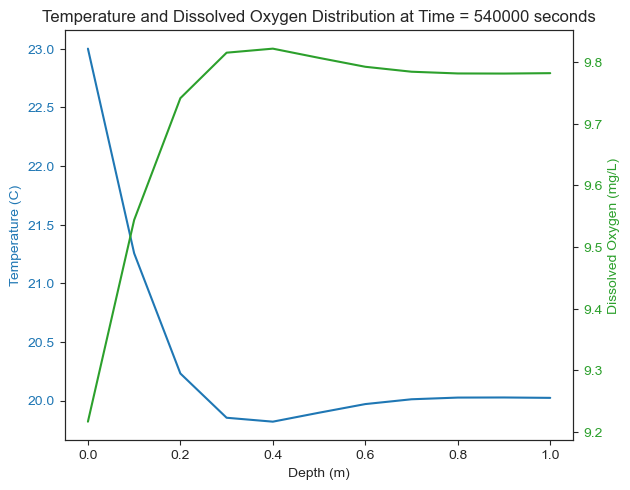

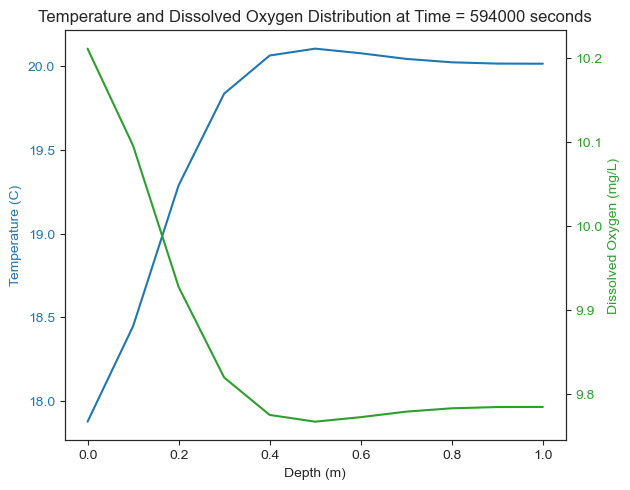

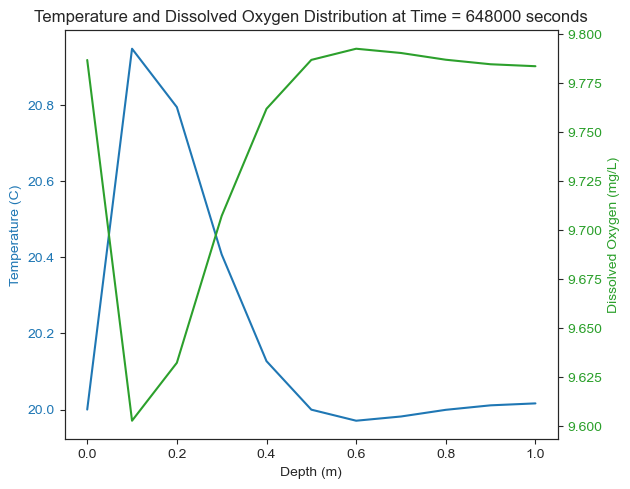

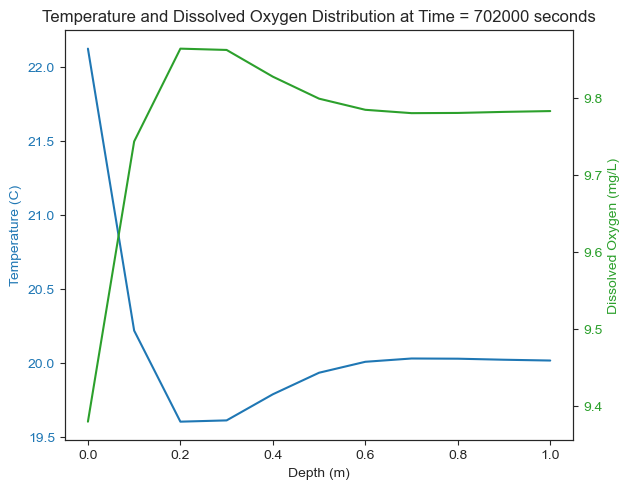

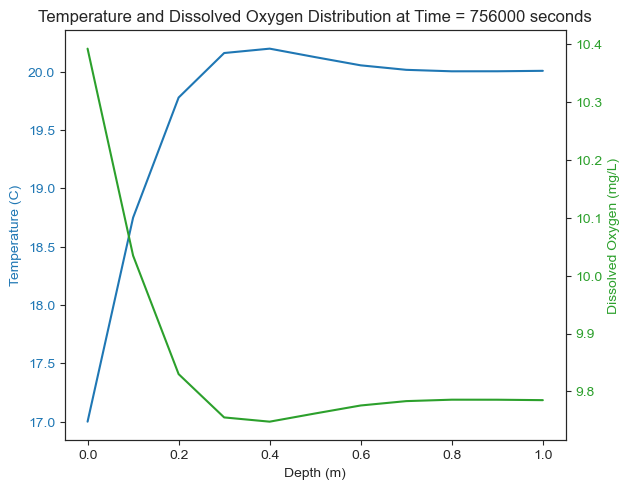

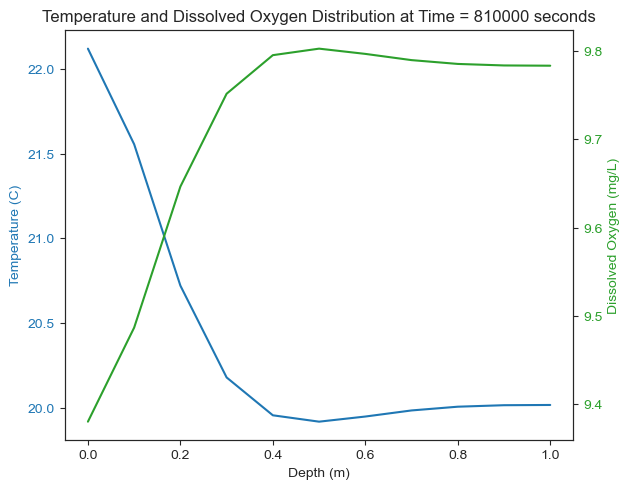

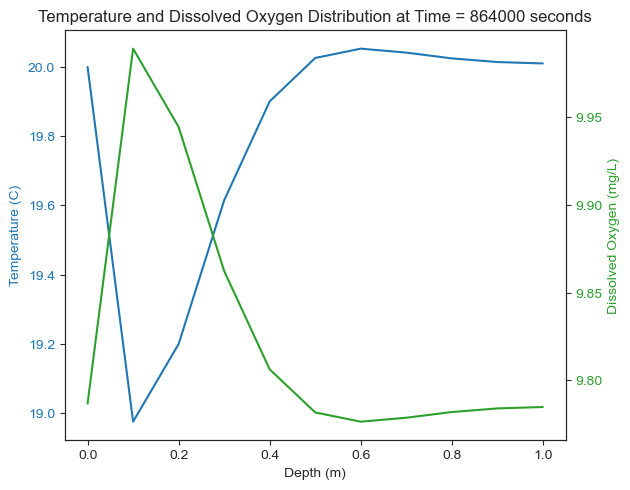

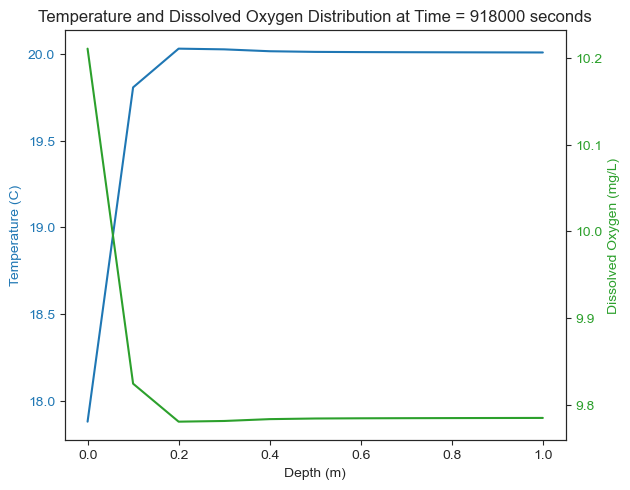

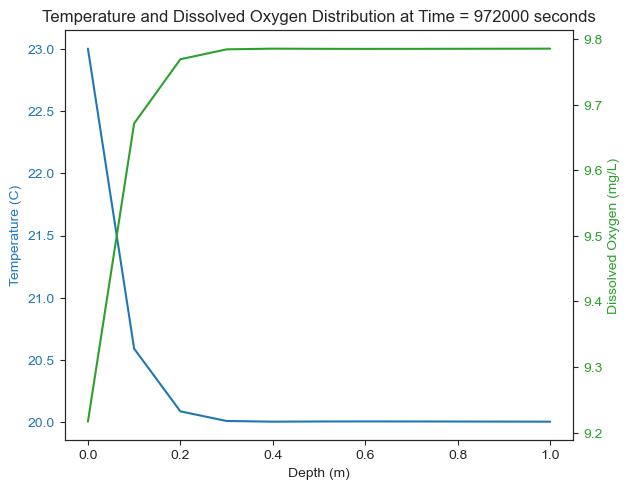

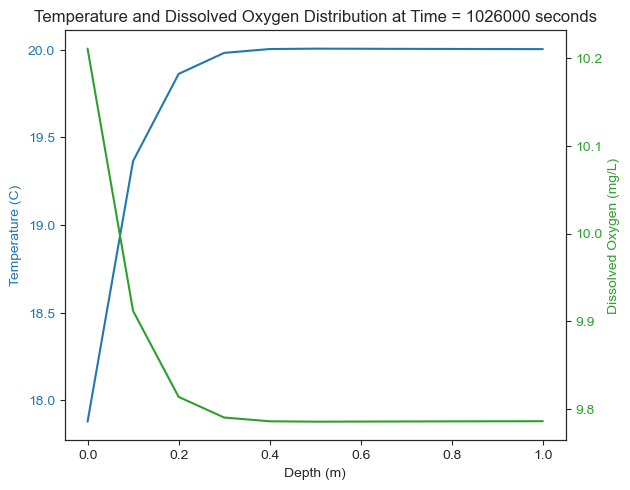

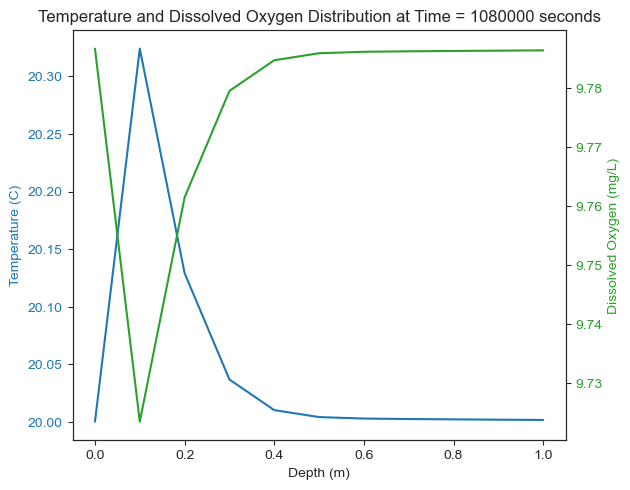

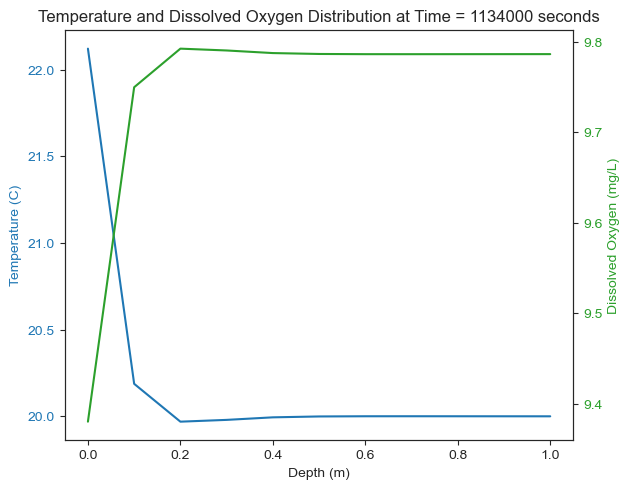

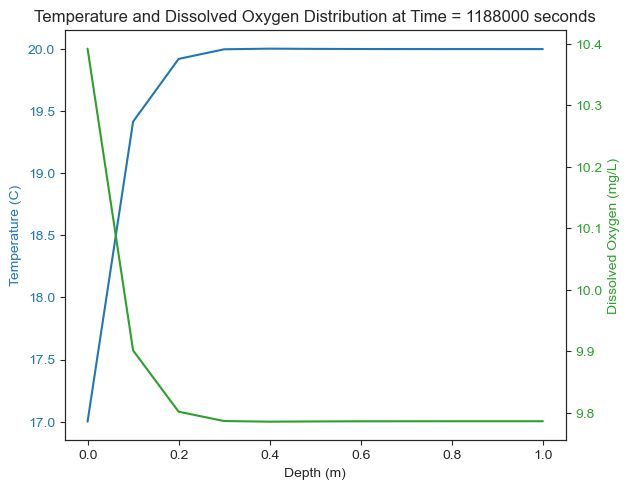

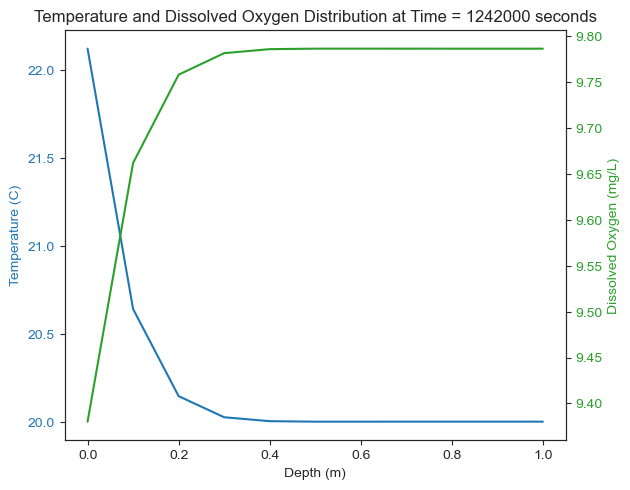

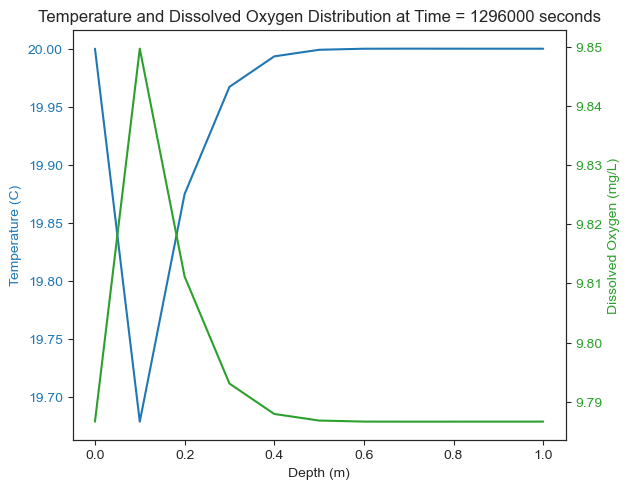

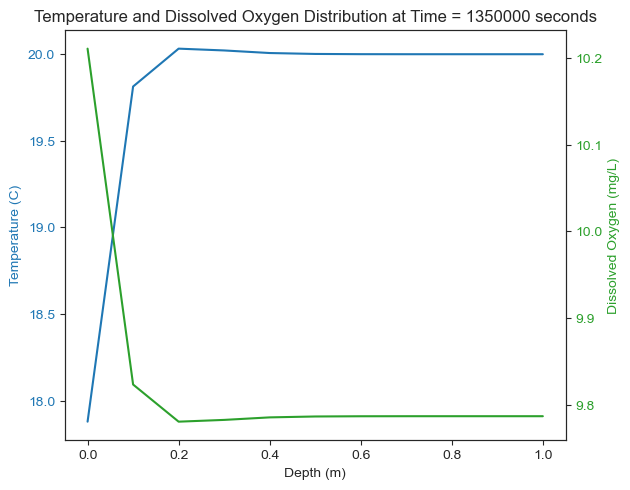

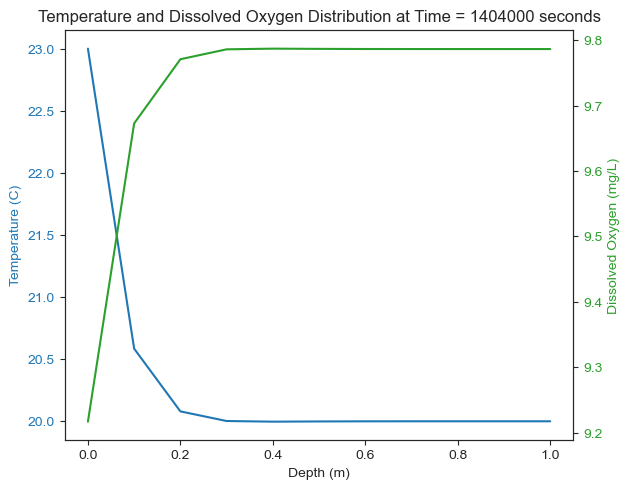

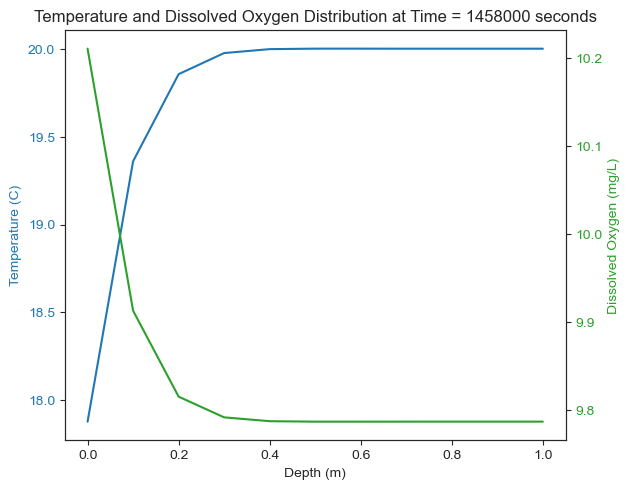

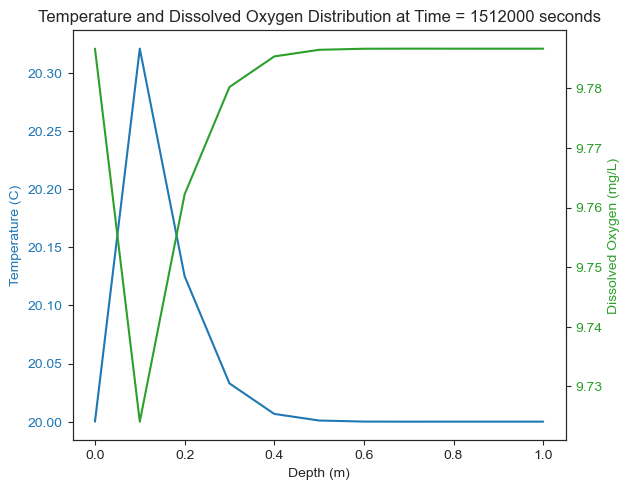

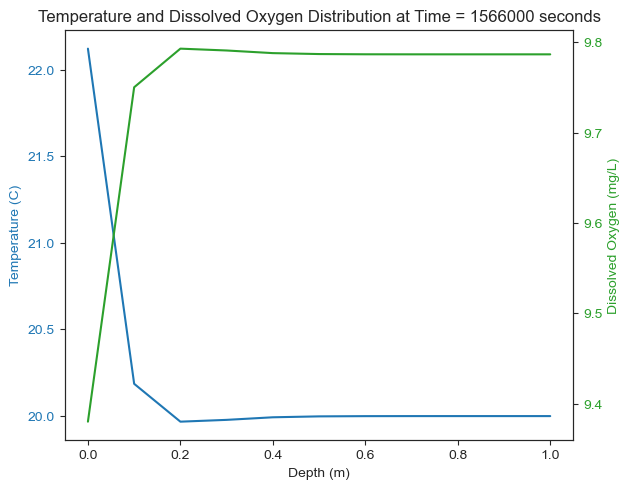

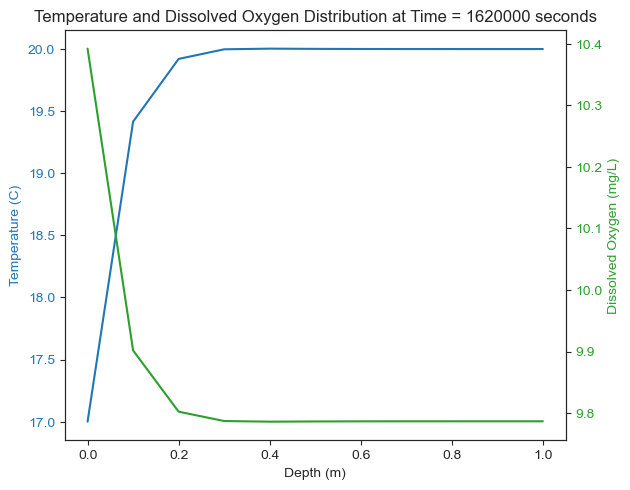

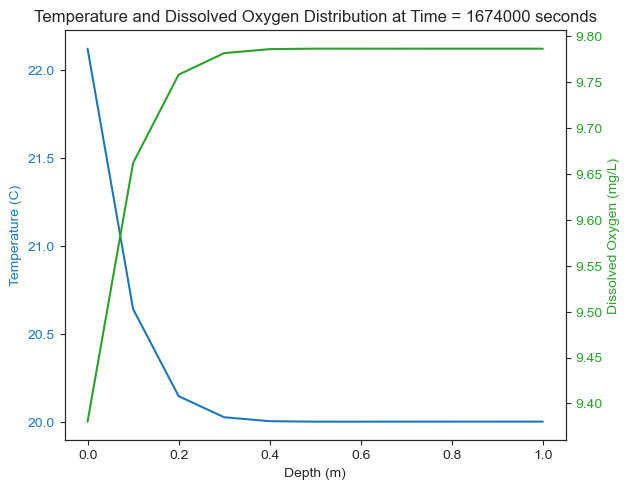

In [6]:
# Extract time and temperature data
time = tab[:, 0]  # First column is time
temperature_data = tab[:, 1:]  # Remaining columns are temperature measurements at different depths

# Constants for the empirical formula for DO
C_0 = 14.6  # Saturation concentration at 0°C in mg/L
alpha = 0.02  # Temperature coefficient

# Function to calculate DO saturation
def DO_sat(T):
    return C_0 * np.exp(-alpha * T)

# Calculate DO for each temperature measurement
DO_data = DO_sat(temperature_data)

# Determine the number of depth points based on the temperature data
num_depth_points = temperature_data.shape[1]
depth_values = np.linspace(0, 0.1 * (num_depth_points - 1), num_depth_points)  # Depths from 0m to 0.(num_depth_points-1)*0.1m

# Plotting temperature and DO for each time step
for t in range(0, len(time), 60):  # Plot every 60 time steps
    T = temperature_data[t, :]  # Temperature at all depths for time step t
    DO = DO_data[t, :]  # Dissolved oxygen at all depths for time step t

    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('Depth (m)')
    ax1.set_ylabel('Temperature (C)', color=color)
    ax1.plot(depth_values, T, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('Dissolved Oxygen (mg/L)', color=color)
    ax2.plot(depth_values, DO, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title(f'Temperature and Dissolved Oxygen Distribution at Time = {int(time[t])} seconds')
    plt.show()

